<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Nootebook covers: 
1. Projection Methods - PCA
   * PCA (SVD + Sklearn)
   * PCA for Compression & De-compression
   * PCA types ( Incremntal + Randomized + Kernal PCA)
2. Linear Discriminant Analysis(LDA)
3. Manifold technique - Locally Linear Embedding - LLE
4. T-Distributed Stochastic Neighborhood Embedding / T-SNE
5. MDS and Isomap 

# **Projection Methods - PCA**

**PCA withput using sklearn**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1.dataset
dataset = np.matrix([[3,7,2,9],
                     [4,6,2,3],
                     [1,7,4,3],
                     [9,3,2,6]])
df = pd.DataFrame(dataset, columns= ['feature 1','feature 2','feature 3','feature 4'])
print(df.shape)
df

(4, 4)


,feature 1,feature 2,feature 3,feature 4
0,3,7,2,9
1,4,6,2,3
2,1,7,4,3
3,9,3,2,6


In [ ]:
# 2. standredization
standardScaler = StandardScaler()
df_scaling = standardScaler.fit_transform(df)

In [ ]:
# 3. #covariance matrix
covariance_matrix = np.cov(df_scaling.T)

In [ ]:
#eigenvalues, eigen vectors
eigen_values, eigen_vectors= np.linalg.eig(covariance_matrix)

In [ ]:
#getting first and second eigen =  2D
pca_with_2 = eigen_vectors[:,(0,1)]
y = df_scaling.dot(pca_with_2)

In [ ]:
pca_with_2 = eigen_vectors[:,(0,1)]
y = df_scaling.dot(pca_with_2)
y

array([[ 0.05105018,  1.83066118],
       [-0.09665542, -0.41369579],
       [-2.21902908, -0.68592726],
       [ 2.26463432, -0.73103814]])

**using sklearn PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA (n_components = 2)
y = pca.fit_transform(df_scaling)
y

array([[ 0.05105018,  1.83066118],
       [-0.09665542, -0.41369579],
       [-2.21902908, -0.68592726],
       [ 2.26463432, -0.73103814]])

## **PCA using SVD decomposition**

How can you find the principal components of a training set? Luckily, there is a
standard matrix factorization technique called Singular Value Decomposition (SVD)
that can decompose the training set matrix X into the matrix multiplication of three
matrices U Σ VT, where V contains all the principal components that we are looking
for

Build 3D dataset

In [ ]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [ ]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [ ]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

np.allclose(X_centered, U.dot(S).dot(Vt))

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

X2D_using_svd = X2D
X2D_using_svd

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

## **PCA using Scikit-Learn**

Scikit-Learn’s PCA class implements PCA using SVD decomposition just like we did
before. The following code applies PCA to reduce the dimensionality of the dataset
down to two dimensions (note that it automatically takes care of centering the data):


In [ ]:
X  #3D Dataset

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [ ]:
from sklearn.decomposition import PCA

pca = PCA ( n_components=2)
X2D = pca.fit_transform(X)
X2D

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

After fitting the PCA transformer to the dataset, you can access the principal components
using the components_ variable (note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to pca.components_.T[:,
0]).

In [ ]:
pca.components_.T[:,0]

array([-0.93636116, -0.29854881, -0.18465208])

Another very useful piece of information is the explained variance ratio of each principal
component, available via the explained_variance_ratio_ variable. It indicates
the proportion of the dataset’s variance that lies along the axis of each principal component.
For example, let’s look at the explained variance ratios of the first two components
of the 3D dataset

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6%
lies along the second axis. This leaves less than 1.2% for the third axis, so it is reasonable
to assume that it probably carries little information.

**Choosing the Right Number of Dimensions**

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
generally preferable to choose the number of dimensions that add up to a sufficiently
large portion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality
for data visualization—in that case you will generally want to reduce the
dimensionality down to 2 or 3.
The following code computes PCA without reducing dimensionality, then computes
the minimum number of dimensions required to preserve 95% of the training set’s
variance:

In [ ]:
pca = PCA ()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) # cumsum return cimulative summtion 
ND = np.argmax ( cumsum >= 0.95) +1 # We are adding 1 , as counting start from zero
ND

2



You could then set n_components=d and run PCA again pca = PCA (n_compentens = 2) . 
However, there is a much
better option: instead of specifying the number of principal components you want to
preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the
ratio of variance you wish to preserve:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca = PCA (n_components=0.95)
X_reduced = pca.fit_transform(X)

## **PCA for Compression & De-Compression**

Obviously after dimensionality reduction, the training set takes up much less space.
For example, try applying PCA to the MNIST dataset while preserving 95% of its variance.
You should find that each instance will have just over 150 features, instead of
the original 784 features. So while most of the variance is preserved, the dataset is
now less than 20% of its original size! This is a reasonable compression ratio, and you
can see how this can speed up a classification algorithm (such as an SVM classifier)
tremendously.

the following code compresses the MNIST dataset down to 154 dimensions, then uses
the inverse_transform() method to decompress it back to 784 dimensions.


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA ()
pca.fit(X_train) # Fit not apply PCA transpformation , u need to use transform 



PCA()

In [ ]:
np.argmax ( np.cumsum ( pca.explained_variance_ratio_) >=0.95) +1

154

In [ ]:
pca = PCA ( n_components= 0.95)
pca.fit_transform (X_train)
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_) # portion of variance included within the new reduced dataset

0.9503684424557437

In [ ]:
pca = PCA ( n_components= 0.95)
x_reduced = pca.fit_transform (X_train)
x_recovered = pca.inverse_transform (x_reduced)

Text(0.5, 1.0, 'Compressed')

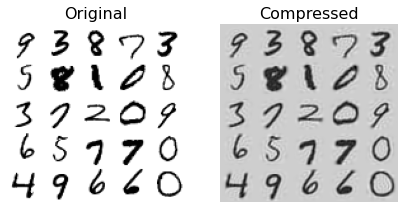

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("Compressed", fontsize=16)

# save_fig("mnist_compression_plot")

## 1. Incremental PCA

One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed: you can split the training
set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new
instances arrive).

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batch = 100
ipca = IncrementalPCA(n_components= 154)
for miniBatch in np.array_split (X_train , n_batch):
  ipca.partial_fit(miniBatch)

X_reduced = ipca.transform(X_train)

In [ ]:
# ipca.explained_variance_ratio_

In [ ]:
ipca.n_components

154

## 2. Randomized PCA

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic
algorithm called Randomized PCA that quickly finds an approximation of the
first d principal components.

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)
rnd_pca.n_components

154

**Time complexity**
1. PCA 
2. Incrementaal PCA 
3. Randomized PCA 

In [ ]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 5.2 seconds
    IncrementalPCA: 27.7 seconds
    PCA: 4.1 seconds
n_components = 10
    PCA: 4.0 seconds
    IncrementalPCA: 26.9 seconds
    PCA: 4.3 seconds
n_components = 154
    PCA: 10.2 seconds
    IncrementalPCA: 41.4 seconds
    PCA: 9.2 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

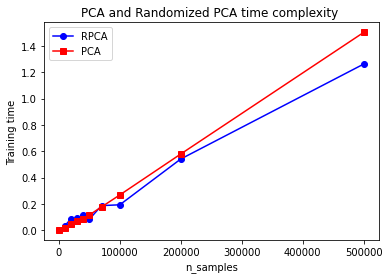

In [ ]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

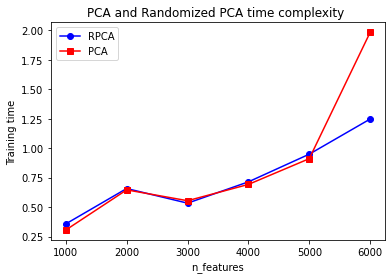

In [ ]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")


## 3. Kernel PCA

the kernel trick, a mathematical technique that implicitly
maps instances into a very high-dimensional space (called the feature space), enabling
nonlinear classification and regression with Support Vector Machines. Recall that a
linear decision boundary in the high-dimensional feature space corresponds to a
complex nonlinear decision boundary in the original space.
It turns out that the same trick can be applied to PCA, making it possible to perform
complex nonlinear projections for dimensionality reduction.

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

As kPCA is an unsupervised learning algorithm, there is no obvious performance
measure to help you select the best kernel and hyperparameter values. However,
dimensionality reduction is often a preparation step for a supervised learning task
(e.g., classification), so you can simply use grid search to select the kernel and hyperparameters
that lead to the best performance on that task.

For example, the following
code creates a two-step pipeline, first reducing dimensionality to two dimensions
using kPCA, then applying Logistic Regression for classification. Then it uses Grid
SearchCV to find the best kernel and gamma value for kPCA in order to get the best
classification accuracy at the end of the pipeline:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np


y = t > 6.9


clf = Pipeline([
("kpca", KernelPCA(n_components=2)),
("log_reg", LogisticRegression())
])
param_grid = [{
"kpca__gamma": np.linspace(0.03, 0.05, 10),
"kpca__kernel": ["rbf", "sigmoid"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

# **Linear Discriminant Analysis(LDA)**

Both PCA and LDA are linear reduction techniques but unlike PCA, LDA focuses on maximizing the separability of two groups.

LDA uses features to create a new axes and tries to project the data onto a new axes in a way to maximize the separation of the two categories or groups. This is why LDA is a Supervised learning algorithm since it is makes use of target values to find the new axes.

PCA tries to find the components that maximizes the variance, while on the other hand LDA tries to find the new axes 
https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

In [2]:
from sklearn.datasets import load_iris
iris =load_iris()
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(iris.data , iris.target)

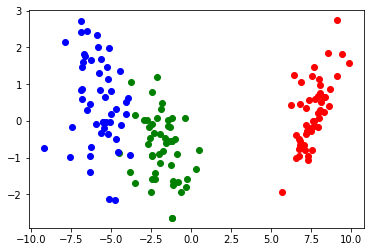

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.scatter ( lda_result[iris.target==0,0] ,lda_result[iris.target==0,1], color= 'r' )
plt.scatter ( lda_result[iris.target==1,0] ,lda_result[iris.target==1,1], color= 'g' )
plt.scatter ( lda_result[iris.target==2,0] ,lda_result[iris.target==2,1], color= 'b' )


To know the difference between the working of PCA and LDA, let’s look at the following plot. Where PCA tries to maximizes the variance unlike LDA which tries to maximizes the separability of three categories.

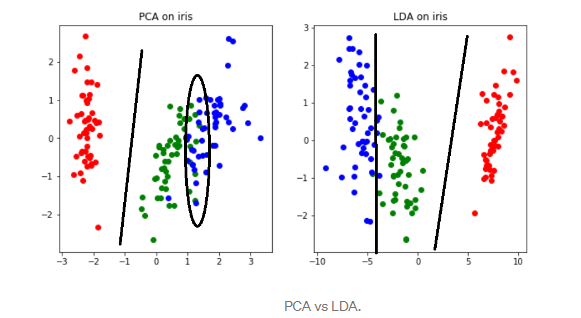

array([8.06179978, 7.12868772, 7.48982797, 6.81320057, 8.13230933,
       7.70194674, 7.21261762, 7.60529355, 6.56055159, 7.34305989,
       8.39738652, 7.21929685, 7.32679599, 7.57247066, 9.849843  ,
       9.1582389 , 8.58243141, 7.78075375, 8.07835876, 8.02097451,
       7.49680227, 7.58648117, 8.68104293, 6.25140358, 6.55893336,
       6.77138315, 6.82308032, 7.92461638, 7.99129024, 6.82946447,
       6.75895493, 7.37495254, 9.12634625, 9.46768199, 7.06201386,
       7.95876243, 8.61367201, 8.33041759, 6.93412007, 7.68823131,
       7.91793715, 5.66188065, 7.24101468, 6.41443556, 6.85944381,
       6.76470393, 8.08189937, 7.18676904, 8.31444876, 7.67196741])

# **Manifold Methods - Locally Linear Embedding (LLE)**

is a very powerful nonlinear dimensionality
reduction (NLDR) technique.

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

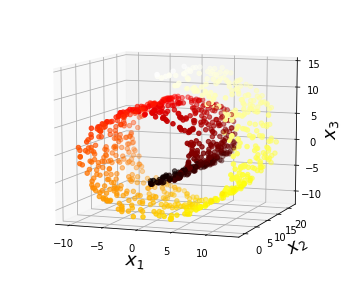

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# save_fig("swiss_roll_plot")
plt.show()

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2 , n_neighbors=10)
x_reduced = lle.fit_transform(X)

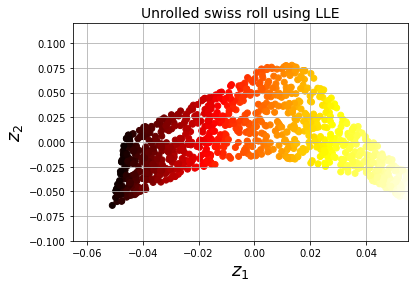

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

# save_fig("lle_unrolling_plot")
plt.show()

# **T-Distributed Stochastic Neighborhood Embedding / T-SNE**

T-SNE has been used for visualization in a wide range of applications, including computer security research, music analysis, cancer research, bioinformatics, and biomedical signal processing.It is often used to visualize high-level representations learned by an artificial neural network.

T-SNE is a machine learning algorithm often used for visualization developed by Laurens van der Maaten and Geoffrey Hinton (God father of Deep learning). It is a non-linear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.


**Advantages**:

* Unlike PCA, T-SNE is a non-linear reduction technique that means it works well with any polynomial or non linear data.
* T-SNE is a capable to preserve local and global structures while PCA tries to project High D to low D that explains most of the variance in the data. Hence it only cares about global structures.
* T-SNE is widely used in visualization tasks.

**Disadvantages**:

* T-SNE has a quadratic time and space complexity because we are finding similarity between points with every other points in the data (order of 0(N²)). Which is huge especially when we have time and memory constraints.
* It is not recommended to use T-SNE while working with large datasets.
* T-SNE is a non-parametric mapping method that means it doesn’t have explicit function that maps the given point to a low dimensional space. T-SNE embeds the points into low dimensions based on the neighbourhood of that point. So when a test data point comes, as it is not present before, we need to train the whole T-SNE algorithm again for embedding which is rarely used because of it’s quadratic time-complexity.

In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [29]:
l = mnist['target']
l.shape

(70000,)

In [36]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(mnist.data)


In [41]:
#picking only the top 1000 data points as TSNEtakes lot of time for 15k points
data_1000 = scaled_data[0:1000,:]
labels_1000 = l[0:1000] 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


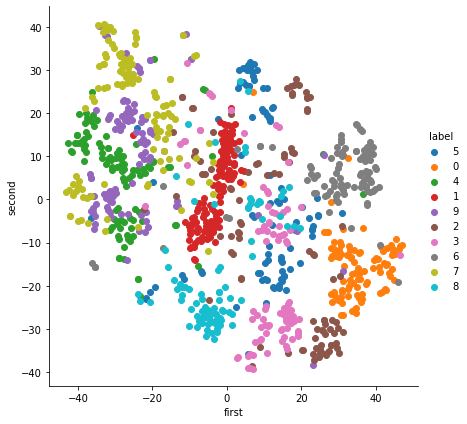

In [45]:
import numpy as np
import pandas as pd
import seaborn as sn 

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=0)
tsne_data = tsne.fit_transform(data_1000) #with perplexity = 30 and n_iter = 1000 and learning_rate=200

#Data-visulization
tsne_data = np.vstack ((tsne_data.T , labels_1000)).T
tsne_data_df = pd.DataFrame (data=tsne_data , columns=('first_dim' , 'second_dim','label'))


#plotting the result of tsne
sn.FacetGrid(tsne_data_df, hue='label', size= 6).map(plt.scatter,'first_dim','second_dim').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


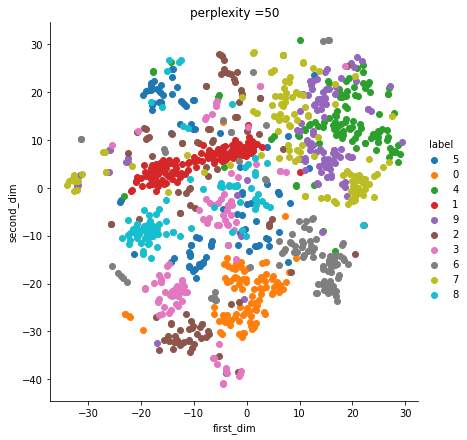

In [46]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=0 , perplexity =50)
tsne_data = tsne.fit_transform(data_1000) #with perplexity = 30 and n_iter = 1000 and learning_rate=200
#create new data
#Data-visulization
tsne_data = np.vstack ((tsne_data.T , labels_1000)).T
tsne_data_df = pd.DataFrame (data=tsne_data , columns=('first_dim' , 'second_dim','label'))


#plotting the result of tsne
sn.FacetGrid(tsne_data_df, hue='label', size= 6).map(plt.scatter,'first_dim','second_dim').add_legend()
plt.title('perplexity =50')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


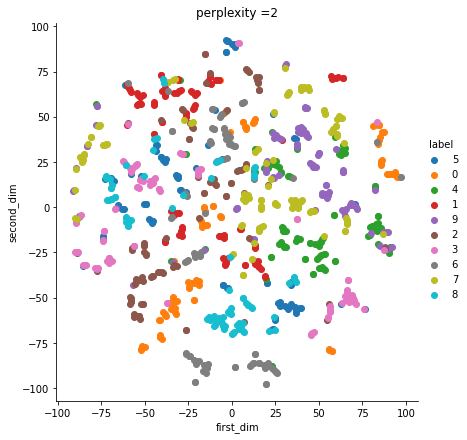

In [47]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=0 , perplexity =2)
tsne_data = tsne.fit_transform(data_1000) #with perplexity = 30 and n_iter = 1000 and learning_rate=200
#create new data
#Data-visulization
tsne_data = np.vstack ((tsne_data.T , labels_1000)).T
tsne_data_df = pd.DataFrame (data=tsne_data , columns=('first_dim' , 'second_dim','label'))


#plotting the result of tsne
sn.FacetGrid(tsne_data_df, hue='label', size= 6).map(plt.scatter,'first_dim','second_dim').add_legend()
plt.title('perplexity =2')
plt.show()

we can see has the perplexity got decreased, the data is mixed up with all the clusters. Hence it is always important to choose the right parameter values.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


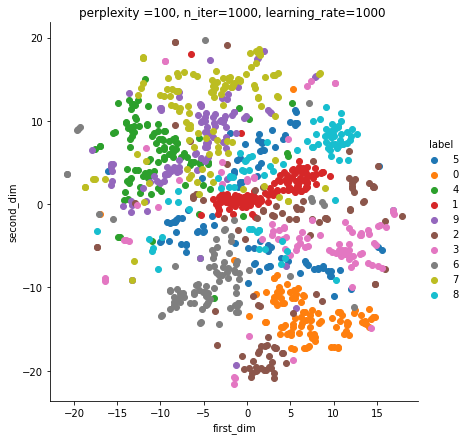

In [57]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=0 , perplexity =100, n_iter=1000, learning_rate=1000)
tsne_data = tsne.fit_transform(data_1000) 
#create new data
#Data-visulization#

tsne_data = np.vstack ((tsne_data.T , labels_1000)).T
tsne_data_df = pd.DataFrame (data=tsne_data , columns=('first_dim' , 'second_dim','label'))


#plotting the result of tsne
sn.FacetGrid(tsne_data_df, hue='label', size= 6).map(plt.scatter,'first_dim','second_dim').add_legend()
plt.title('perplexity =100, n_iter=1000, learning_rate=1000 ')
plt.show()

Out of all the values perplexity =100 is doing good on our data. But note that we tried T-SNE on 5000 data points only, Since it takes lot of time because of its time complexity.

# **MDS and Isomap**

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

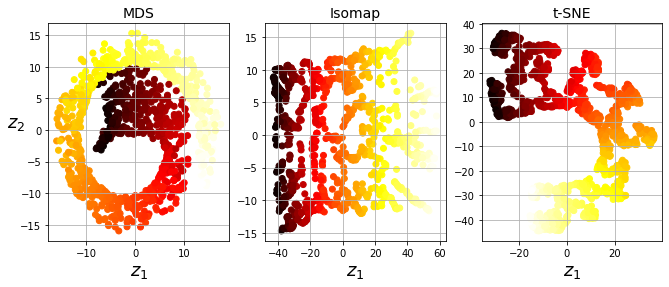

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

# save_fig("other_dim_reduction_plot")
plt.show()